In [550]:
import pandas as pd

#Loading dataset
wine = pd.read_csv('winequality-red.csv')
wine_test = pd.read_csv('winequality-red_test.csv')

In [551]:
from autograd import grad

In [552]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [553]:
wine_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.670,0.02,2.20,0.072,31,92,0.99566,3.32,0.68,11.066667
1,7.2,0.370,0.32,2.00,0.062,15,28,0.99470,3.23,0.73,11.300000
2,7.4,0.785,0.19,5.20,0.094,19,98,0.99713,3.16,0.52,9.566667
3,6.9,0.630,0.02,1.90,0.078,18,30,0.99712,3.40,0.75,9.800000
4,6.9,0.580,0.20,1.75,0.058,8,22,0.99322,3.38,0.49,11.700000


In [554]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1439 non-null   float64
 1   volatile acidity      1439 non-null   float64
 2   citric acid           1439 non-null   float64
 3   residual sugar        1439 non-null   float64
 4   chlorides             1439 non-null   float64
 5   free sulfur dioxide   1439 non-null   float64
 6   total sulfur dioxide  1439 non-null   float64
 7   density               1439 non-null   float64
 8   pH                    1439 non-null   float64
 9   sulphates             1439 non-null   float64
 10  alcohol               1439 non-null   float64
 11  quality               1439 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 135.0 KB


In [555]:
import seaborn as sns
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

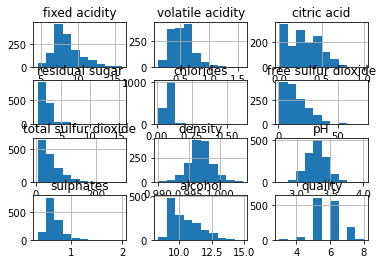

In [556]:
wine.hist()

In [557]:
# Check the correlation between columns
# f, ax = plt.subplots(figsize = (12, 10))
# cmap = sns.cubehelix_palette(start = .5, rot = -.5, as_cmap=True)
# sns.heatmap(wine.corr(), annot = True, cmap = cmap)
# plt.show()

In [558]:
# quality와의 상관성 낮아보이는 컬럼 몇 개 삭제해보자

In [559]:
wine.drop(columns=['pH', 'residual sugar', 'fixed acidity'], inplace=True)
wine_test.drop(columns=['pH', 'residual sugar', 'fixed acidity'], inplace=True)

In [560]:
bins = (0, 5, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [561]:
# Check quality
wine.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,0.076,11.0,34.0,0.9978,0.56,9.4,bad
1,0.88,0.00,0.098,25.0,67.0,0.9968,0.68,9.8,bad
2,0.76,0.04,0.092,15.0,54.0,0.9970,0.65,9.8,bad
3,0.28,0.56,0.075,17.0,60.0,0.9980,0.58,9.8,good
4,0.70,0.00,0.076,11.0,34.0,0.9978,0.56,9.4,bad


In [562]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [563]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [564]:
wine['quality'].value_counts()

1    769
0    670
Name: quality, dtype: int64

In [565]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [566]:
import numpy

In [567]:
def logistic(x):
    """Logistic/sigmoid function.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input to the logistic function.
    
    Returns
    -------
    numpy.ndarray
        The output.
        
    Notes
    -----
    The function does not restrict the shape of the input array. The output
    has the same shape as the input.
    """
    out = 1. / (1. + numpy.exp(-x))

    return out

In [568]:
def logistic_model(x, params):
    """A logistic regression model.
    
    A a logistic regression is y = sigmoid(x * w + b), where the operator *
    denotes a mat-vec multiplication.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    params : a tuple/list of two elemets
        The first element is a 1D array with shape (n_total_pixels). The
        second element is a scalar (the intercept)

    Returns
    -------
    probabilities : numpy.ndarray
        The output is a 1D array with length n_samples.
    """

    out = logistic(numpy.dot(x, params[0]) + params[1])

    return out

In [569]:
def model_loss(x, true_labels, params, _lambda=1.0):
    """Calculate the predictions and the loss w.r.t. the true values.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    true_labels : numpy.ndarray
        The true labels of the input images. Should be 1D and have length of
        n_images.
    params : a tuple/list of two elements
        The first element is a 1D array with shape (n_total_pixels). The
        second elenment is a scalar.
    _lambda : float
        The weight of the regularization term. Default: 1.0
    
    Returns
    -------
    loss : a scalar
        The summed loss.
    """
    pred = logistic_model(x, params)
    
    loss = - (
        numpy.dot(true_labels, numpy.log(pred+1e-15)) +
        numpy.dot(1.-true_labels, numpy.log(1.-pred+1e-15))
    ) + _lambda * numpy.sum(params[0]**2)
    
    return loss

In [570]:
# splitting the dataset
# train : val= 9 : 1
# parameter 조금씩 만져보자

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 269, shuffle=False)

In [571]:
X_train

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4
1,0.880,0.00,0.098,25.0,67.0,0.99680,0.68,9.8
2,0.760,0.04,0.092,15.0,54.0,0.99700,0.65,9.8
3,0.280,0.56,0.075,17.0,60.0,0.99800,0.58,9.8
4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1290,0.740,0.00,0.100,6.0,12.0,0.99521,0.59,11.0
1291,0.635,0.10,0.073,25.0,60.0,0.99638,0.75,10.9
1292,0.395,0.13,0.056,14.0,28.0,0.99362,0.67,12.4
1293,0.755,0.00,0.084,6.0,12.0,0.99672,0.49,9.7


In [572]:
X_val

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
1295,0.630,0.00,0.093,51.0,77.5,0.99558,0.45,9.5
1296,0.630,0.00,0.093,51.0,77.5,0.99558,0.45,9.5
1297,0.530,0.14,0.064,15.0,29.0,0.99323,0.61,12.1
1298,0.600,0.00,0.063,11.0,18.0,0.99191,0.56,12.2
1299,1.580,0.00,0.137,5.0,9.0,0.99476,0.40,10.9
...,...,...,...,...,...,...,...,...
1434,0.540,0.37,0.214,55.0,95.0,1.00369,0.77,9.0
1435,0.540,0.37,0.214,55.0,95.0,1.00369,0.77,9.0
1436,0.380,0.38,0.169,27.0,90.0,0.99914,0.65,8.5
1437,0.915,0.29,0.070,15.0,39.0,0.99577,0.54,11.1


In [573]:
# z-score normalization

# calculate mu and sigma
mu = numpy.mean(X_train, axis=0)
sigma = numpy.std(X_train, axis=0)

# normalize the training, validation, and test datasets
X_train = (X_train - mu) / sigma
X_val = (X_val - mu) / sigma

wine_test = (wine_test - mu) / sigma

In [574]:
def classify(x, params):
    """Use a logistic model to label data with 0 or/and 1.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    params : a tuple/list of two elements
        The first element is a 1D array with shape (n_total_pixels). The
        second element is a scalar.
    
    Returns
    -------
    labels : numpy.ndarray
        The shape of the label is the same with `probability`.
    
    Notes
    -----
    This function only works with multiple images, i.e., x has a shape of
    (n_images, n_total_pixels).
    """
    probabilities = logistic_model(x, params)
    labels = (probabilities >= 0.5).astype(int)
    return labels

In [575]:
def performance(predictions, answers, beta=1.0):

    true_idx = (answers == 1)  # the location where the answers are 1
    false_idx = (answers == 0)  # the location where the answers are 0
    
    # true positive: answers are 1 and predictions are also 1
    n_tp = numpy.count_nonzero(predictions[true_idx] == 1)
    
    # false positive: answers are 0 but predictions are 1
    n_fp = numpy.count_nonzero(predictions[false_idx] == 1)
    
    # true negative: answers are 0 and predictions are also 0
    n_tn = numpy.count_nonzero(predictions[false_idx] == 0)
    
    # false negative: answers are 1 but predictions are 0
    n_fn = numpy.count_nonzero(predictions[true_idx] == 0)
    
    accuracy = (n_tp + n_tn) / (n_tp + n_fn + n_fp + n_tn)

    return accuracy

In [576]:
# a function to get the gradients of a logistic model
gradients = grad(model_loss, argnum=2)

# initialize parameters
w = numpy.zeros(X_train.shape[1], dtype=float)
b = 0.

In [577]:
# initial accuracy
pred_labels_test = classify(X_train, (w, b))
perf = performance(pred_labels_test, y_train)

print("Initial Accuracy: {:.1f}%".format(perf*100))

Initial Accuracy: 54.3%


In [578]:
from autograd import numpy
from autograd import grad

# learning rate
lr = 1e-5

# a variable for the change in validation loss
change = numpy.inf

# a counter for optimization iterations
i = 0

# a variable to store the validation loss from the previous iteration
old_val_loss = 1e-15

# keep running if:
#   1. we still see significant changes in validation loss
#   2. iteration counter < 10000
X_train = numpy.array(X_train)
y_train = numpy.array(y_train)

while change >= 1e-5 and i < 10000:
    
    # calculate gradients and use gradient descents
    grads = gradients(X_train, y_train, (w, b))
    w -= (grads[0] * lr)
    b -= (grads[1] * lr)
    
    # validation loss
    val_loss = model_loss(X_val, y_val, (w, b))
    
    # calculate f-scores against the validation dataset
    pred_labels_val = classify(X_val, (w, b))
    score = performance(pred_labels_val, y_val)

    # calculate the chage in validation loss
    change = numpy.abs((val_loss-old_val_loss)/old_val_loss)

    # update the counter and old_val_loss
    i += 1
    old_val_loss = val_loss
    
    # print the progress every 10 steps
    if i % 10 == 0:
        print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation Accuracy:", score)
print("    Change in validation loss:", change)

10...20...30...40...50...60...70...80...90...100...110...120...130...140...150...160...170...180...190...200...210...220...230...240...250...260...270...280...290...300...310...320...330...340...350...360...370...380...390...400...410...420...430...440...450...460...470...480...490...500...510...520...530...540...550...560...570...580...590...600...610...620...630...640...650...660...670...680...690...700...710...720...730...740...750...760...770...780...790...800...810...820...830...840...850...860...870...880...890...900...910...920...930...940...950...960...970...980...990...1000...1010...

Upon optimization stopped:
    Iterations: 1018
    Validation loss: 77.1254665612592
    Validation Accuracy: 0.7847222222222222
    Change in validation loss: 9.993118059724464e-06


In [579]:
pred_labels_test = classify(X_train, (w, b))
perf = performance(pred_labels_test, y_train)

print("After Training: {:.1f}%".format(perf*100))

After Training: 75.1%


In [580]:
submission = pd.read_csv("sample_sub.csv")
pred = classify(wine_test, (w, b))
submission['quality'] = pred
submission.to_csv("sub.csv", index=False)